## Boston Crime incidence 2015-2019

                By: Muluemebet
                    Nov, 2019
                    Boston, MA

               

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 bostonCrime= pd.read_csv("Boston_crime_incident.csv") # read data

C:\Users\tayeh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bostonCrime.shape

(426840, 17)

In [4]:
bostonCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426840 entries, 0 to 426839
Data columns (total 17 columns):
INCIDENT_NUMBER        426840 non-null object
OFFENSE_CODE           426840 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    426840 non-null object
DISTRICT               424671 non-null object
REPORTING_AREA         426840 non-null object
SHOOTING               1747 non-null object
OCCURRED_ON_DATE       426840 non-null object
YEAR                   426840 non-null int64
MONTH                  426840 non-null int64
DAY_OF_WEEK            426840 non-null object
HOUR                   426840 non-null int64
UCR_PART               426730 non-null object
STREET                 414449 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               426840 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 55.4+ MB


## Data Exploration 

In [5]:
bostonCrime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)"
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)"


Text(0.5, 1.0, 'Total number of offenses for each hour in the city of Boston')

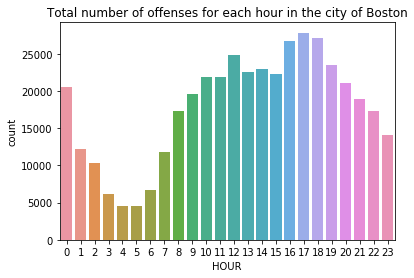

In [18]:
#Total number of offenses for each hour in the city of Boston
sns.countplot(x="HOUR", data= bostonCrime) # total number of crime per hour 
plt.title("Total number of offenses for each hour in the city of Boston")


Text(0.5, 1.0, 'Total number of offenses by week day in the city of Boston')

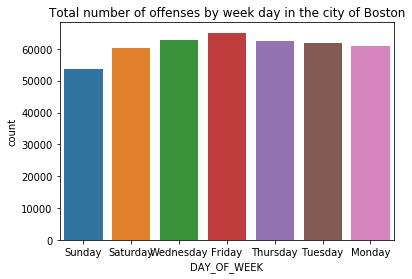

In [20]:
#Total number of offenses by week day in the city of Boston
sns.countplot(x="DAY_OF_WEEK", data= bostonCrime)
plt.title("Total number of offenses by week day in the city of Boston")


Text(0.5, 1.0, 'Total number of offenses by month in the city of Boston')

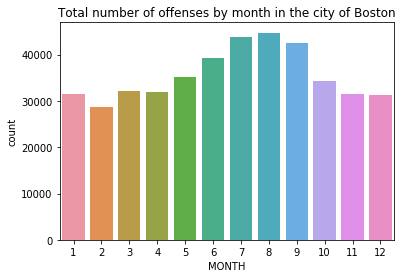

In [22]:
# Total number of offenses by month in the city of Boston
sns.countplot(x="MONTH", data= bostonCrime)
plt.title("Total number of offenses by month in the city of Boston")

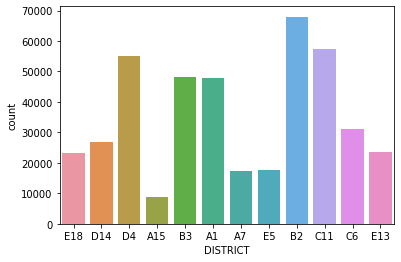

In [23]:
# which district has the most crime , B2,C11,,D4
sns.countplot(x="DISTRICT", data= bostonCrime) 

In [24]:
dist_offense= bostonCrime.groupby(by=["DISTRICT","OFFENSE_CODE_GROUP"])\
["INCIDENT_NUMBER"].count().reset_index()

In [25]:
dist_offense.rename(columns={"INCIDENT_NUMBER": "INCIDENT_COUNT"}, inplace=True)

In [26]:
#offence frequency by area sorted in decending order 
dist_offense.sort_values(by=["DISTRICT","INCIDENT_COUNT"], ascending=[True,False])

,DISTRICT,OFFENSE_CODE_GROUP,INCIDENT_COUNT
29,A1,Larceny,6430
37,A1,Motor Vehicle Accident Response,3874
55,A1,Simple Assault,3233
34,A1,Medical Assistance,3143
13,A1,Drug Violation,2775
40,A1,Other,2735
46,A1,Property Lost,2590
60,A1,Warrant Arrests,2150
26,A1,Investigate Person,2085
27,A1,Investigate Property,1944


In [109]:
bostonCrime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

Text(0.5, 1.0, 'Number of Larceny by hour')

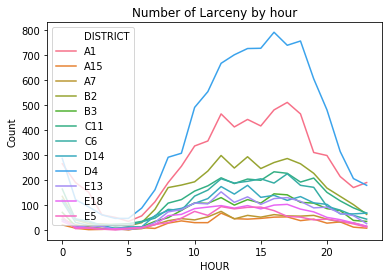

In [58]:
s=bostonCrime[bostonCrime["OFFENSE_CODE_GROUP"]=="Larceny"]\
        .groupby(["DISTRICT", "HOUR"])["INCIDENT_NUMBER"].count().reset_index()
        
s.rename(columns={"INCIDENT_NUMBER":"Count"}, inplace=True)
sns.lineplot(x="HOUR", y="Count", hue="DISTRICT", data=s)
plt.title("Number of "+ "Larceny" + " by hour")

In [56]:
#General function to plot hourly count of each offence group code
def offense_byHour(offense):
    
    offense= str(offense).lower() # make it case insensitive by converting in to lowercase
    group= [group.lower() for group in bostonCrime["OFFENSE_CODE_GROUP"].unique()]
    
    if offense in group:
        s=bostonCrime[bostonCrime["OFFENSE_CODE_GROUP"]==offense]\
        .groupby(["DISTRICT", "HOUR"])["INCIDENT_NUMBER"].count().reset_index()
        
        s.rename(columns={"INCIDENT_NUMBER":"Count"}, inplace=True)
        sns.lineplot(x="HOUR", y="Count", hue="DISTRICT", data=s)
        plt.title("Number of "+ offense + " by hour")
    else:
        raise ValueError ("invalid offence group code!!")
        
        

In [31]:

# the following function is used to extract information about the top five
#most frequent offence group code in a specific distric and shows the time
#and year plot
def district_info(district):
    
    # the top five frequent offese in the district, plot bar plot 
    # when does the top offence occur , time, date, month , year
    # is the trend of the top offend increasing for the last three years
    # which area experiance the most shooting ,when(time, day_of week ), to be completed later
    
    district= district.upper() # convert in to uppercase
    
    if district in bostonCrime["DISTRICT"].unique():
        
        # the top five frequent offeses in the district
        top_five= dist_offense[dist_offense["DISTRICT"]==district].\
        sort_values("INCIDENT_COUNT", ascending=False).iloc[:5]
        
        #
        fig =plt.figure(figsize=(10,12))
        
        # plot the most frequent offence  
        plt.subplot(3,1,1)
        #top_five.plot.bar("OFFENSE_CODE_GROUP","INCIDENT_COUNT")
        sns.barplot(x="OFFENSE_CODE_GROUP",y="INCIDENT_COUNT", data=top_five)
        plt.title("The five most frequent offence in district " + district) # title name
    
        # When does the top offenses occured, time, trend
        plt.subplot(3,1,2)
        
        top_five_gcode=top_five["OFFENSE_CODE_GROUP"] # top five offense group code
        dist_data= bostonCrime[bostonCrime["DISTRICT"]==district] # extract only a district info
        
        # do for the top five 
        for group in top_five_gcode:
            #count offenses for each hour
            hour_dist=dist_data[dist_data["OFFENSE_CODE_GROUP"]==group].\
            groupby("HOUR")["INCIDENT_NUMBER"].count().reset_index()
            
            hour_dist.rename(columns={"INCIDENT_NUMBER":'COUNT'},inplace=True)
            #plot the frequency
            sns.lineplot(x="HOUR", y="COUNT", data=hour_dist)
        plt.legend([g for g in top_five_gcode], loc=1)
        
        # trend 
        plt.subplot(3,1,3)
        for group in top_five_gcode:
            #count offenses for each hour
            year_dist=dist_data[dist_data["OFFENSE_CODE_GROUP"]==group].\
            groupby("YEAR")["INCIDENT_NUMBER"].count().reset_index()
            
            year_dist.rename(columns={"INCIDENT_NUMBER":'COUNT'},inplace=True)
            #plot the frequency
            sns.lineplot(x="YEAR", y="COUNT", data=year_dist)
        plt.legend([g for g in top_five_gcode], loc=1)
            
        print("\n \033[1m" +"The following table shows the top five frequent offenses in district "+ district)
        return top_five        
    else:
        raise ValueError ("Invalid district! Please provide a  valid district from 'E18', 'D14', 'D4', 'A15', 'B3', 'A1', 'A7', 'E5', 'B2', 'C11', 'C6', 'E13'")
    
    


 The following table shows the top five frequent offenses in district A1


,DISTRICT,OFFENSE_CODE_GROUP,INCIDENT_COUNT
29,A1,Larceny,6430
37,A1,Motor Vehicle Accident Response,3874
55,A1,Simple Assault,3233
34,A1,Medical Assistance,3143
13,A1,Drug Violation,2775


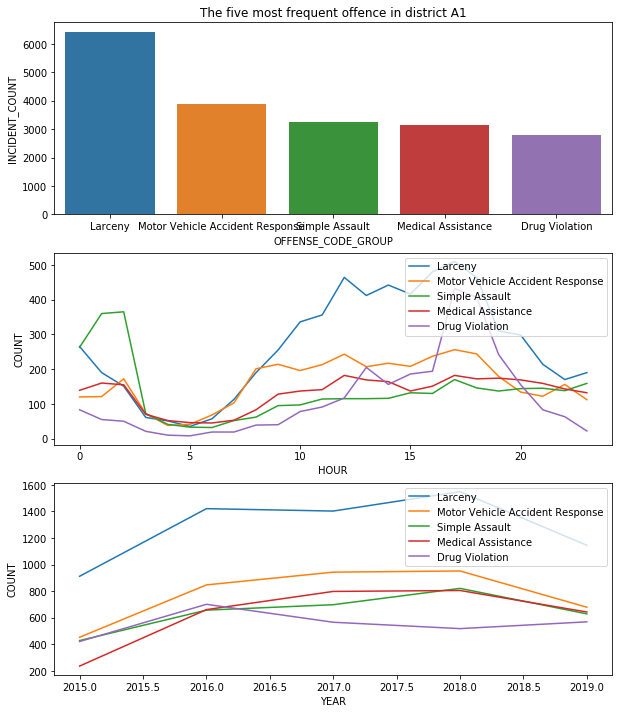

In [59]:
#look at district A1
district_info("A1")


 The following table shows the top five frequent offenses in district B2


,DISTRICT,OFFENSE_CODE_GROUP,INCIDENT_COUNT
216,B2,Motor Vehicle Accident Response,8579
213,B2,Medical Assistance,4768
219,B2,Other,4538
237,B2,Verbal Disputes,4056
207,B2,Larceny,3759


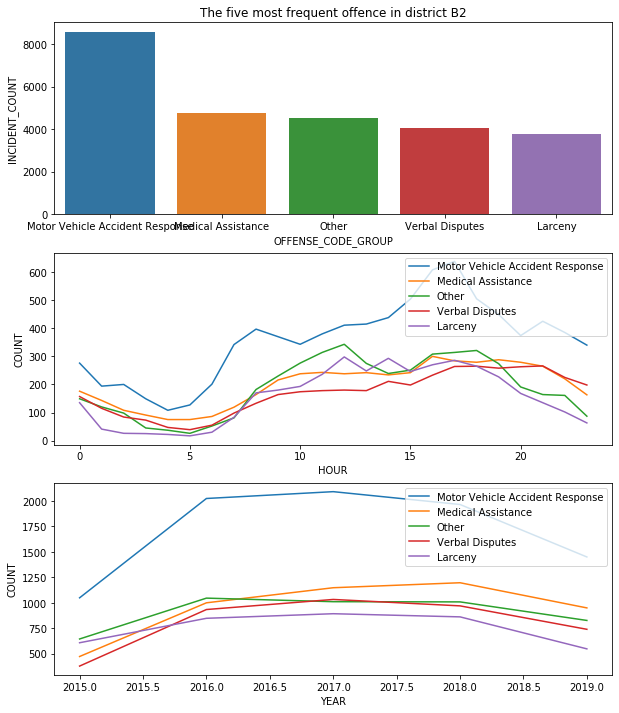

In [60]:
#look at district B2
district_info("B2")